In [1]:
import pandas as pd
data = pd.read_csv('India Agriculture Crop Production.csv')
data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


# Data Cleaning
### Missing Values

In [2]:
# missing values - function
def missing_values(data, n):
    total_missing = data.isnull().sum().sort_values(ascending=False)
    percent_missing = (data.isnull().sum() / data.isnull().count())*100
    missing_data = pd.concat([total_missing, percent_missing], axis=1,
                            keys=['Total', 'Percent'])
    return missing_data.head(n)

In [3]:
# missing data
missing_values(data, 10)

,Total,Percent
Production,10741,1.587907
Crop,967,0.142957
Area,967,0.142957
Area Units,967,0.142957
Production Units,967,0.142957
Yield,967,0.142957
State,0,0.000000
District,0,0.000000
Year,0,0.000000
Season,0,0.000000


In [4]:
data.shape

(676425, 10)

In [5]:
data['Area Units'].unique()

array(['Hectare', nan], dtype=object)

In [6]:
data['Production Units'].unique()

array(['Tonnes', 'Nuts', 'Bales', nan], dtype=object)

In [7]:
# remove all the rows that contain a missing value
data_droped = data.dropna()
data_droped.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [8]:
data_droped.shape

(665684, 10)

Only **1.5879070111246705 %** of data is Missing

In [9]:
100 - (665684/676425)*100

1.5879070111246705

Droping add missing Values from data

In [9]:
missing_values(data_droped, 10)

,Total,Percent
State,0,0.0
District,0,0.0
Crop,0,0.0
Year,0,0.0
Season,0,0.0
Area,0,0.0
Area Units,0,0.0
Production,0,0.0
Production Units,0,0.0
Yield,0,0.0


In [10]:
data = data_droped

Checking there is any different types of units presents.

If present convert into single unit

In [11]:
data['Area Units'].unique()

array(['Hectare'], dtype=object)

**Area Units** have only one type unit, So maybe we can remove this column from data

In [12]:
data['Production Units'].unique()

array(['Tonnes', 'Nuts', 'Bales'], dtype=object)

But **Production Units** have 3 types of Units

So find the index and convert them all into single unit (tonnes)

In [13]:
idx = data[data['Production Units'] == 'Nuts'].index.values
idx

array([    20,     21,     22, ..., 673614, 673615, 673616])

In [14]:
len(idx)

5782

In [15]:
idy = data[data['Production Units'] == 'Bales'].index.values
idy

array([   546,    547,    548, ..., 674316, 674317, 674318])

In [16]:
len(idy)

20742

In [17]:
idz = data[data['Production Units'] == 'Tonnes'].index.values
idz

array([     0,      1,      2, ..., 675505, 675506, 675507])

In [18]:
len(idz)

639160

**Production Units**

**NUTS** into **Tonnes**

1 NUTS = 0.45 Kg

1 Tonne = 1000 Kg

1 NUTS =  0.00045 Tonne

**Removimg NUTS unit from data set**

In [23]:
100 - ((665684-5782)/676425)*100

2.442695051188238

Including this:
Total **2.442695051188238 %** data is Removed

In [19]:
# Removimg NUTS unit
for j in idx:
    data = data.drop(j)

In [20]:
data.shape[0]/676425 * 100

97.55730494881176

**Production Units**

**Bales** into **Tonnes**

1 Bales = 217.7243376 Kg

1 Tonne = 1000 Kg

1 Bales = 0.2177243376 Tonne

1 Tonne = 4.5929637955182825 Bales

In [21]:
# Conversion Bales into Tonnes
for i in idy:
    data['Production'][i] = data['Production'][i] / (0.2177243376)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# Save to a csv file
output = data
output.to_csv('data.csv', index=False)

In [34]:
# Load saved data.csv
data_save = pd.read_csv('data.csv')
data_save.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [35]:
missing_values(data_save, 10)

,Total,Percent
State,0,0.0
District,0,0.0
Crop,0,0.0
Year,0,0.0
Season,0,0.0
Area,0,0.0
Area Units,0,0.0
Production,0,0.0
Production Units,0,0.0
Yield,0,0.0


In [24]:
# Load saved data.csv
import pandas as pd
data  = pd.read_csv('data.csv')
data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [25]:
data['Yield'].describe()

count    659902.000000
mean          4.635414
std          23.690467
min           0.000000
25%           0.562157
50%           1.008469
75%           2.416667
max        9801.000000
Name: Yield, dtype: float64

In [26]:
idx = data['Yield'].sort_values(ascending=False).index
data.iloc[idx].head(4)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
446024,Tamil Nadu,PERAMBALUR,Cashewnut,2008-09,Whole Year,1.0,Hectare,9801.0,Tonnes,9801.0
116073,Tamil Nadu,PERAMBALUR,Cashewnut,2008-09,Whole Year,1.0,Hectare,9801.0,Tonnes,9801.0
220151,Andhra Pradesh,SRIKAKULAM,Onion,2017-18,Kharif,2.0,Hectare,8140.0,Tonnes,4070.0
550102,Andhra Pradesh,SRIKAKULAM,Onion,2017-18,Kharif,2.0,Hectare,8140.0,Tonnes,4070.0


In [27]:
data['Area Units'].unique()

array(['Hectare'], dtype=object)

In [28]:
data['Production Units'].unique()

array(['Tonnes', 'Bales'], dtype=object)

All **Production Units** converted into **Tonnes**

So there is no need of **Production Units** Column

In [29]:
data = data.drop('Production Units', axis=1)
data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,1.696296


All **Area Units** converted into **Hectare**

So there is no need of **Area Units** Column

In [30]:
data = data.drop('Area Units', axis=1)
data.head()

,State,District,Crop,Year,Season,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,5267.0,1.696296


## Feature Engineering

Find Score of DataSet

In [31]:
# find score of data set - function
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def score_dataset(x, y, model=XGBRegressor()):
    # label encoding for categoricals
    for colname in x.select_dtypes(['object', 'category']):
        x[colname], _ = x[colname].factorize()
        # RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(model, x, y,
                               cv=5,
                               scoring='neg_mean_squared_error')
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [17]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [32]:
# assigning variables
x = data.copy()
y = x.pop('Yield')

# Score
score_dataset(x, y)

1.1407533865920862

Initialy We got Score = **1.1407533865920862**

### Mutual Information

In [33]:
# assigning variables
x = data.copy()
y = x.pop('Yield')

# label encoding for categoricals
for colname in x.select_dtypes('object'):
    x[colname], _ = x[colname].factorize()

# all discrete features should now have integer dtypes (double-check this before using MI)
discrete_features = x.dtypes == int

In [34]:
data_x = x
data_x

,State,District,Crop,Year,Season,Area,Production
0,0,0,0,0,0,1254.0,2061.0
1,0,0,0,1,1,1258.0,2083.0
2,0,0,0,2,1,1261.0,1525.0
3,0,1,0,0,0,3100.0,5239.0
4,0,2,0,1,1,3105.0,5267.0
...,...,...,...,...,...,...,...
659897,33,582,39,19,2,6310.0,15280.0
659898,33,583,39,20,2,1895.0,2760.0
659899,33,583,39,21,2,3736.0,5530.0
659900,33,583,39,22,2,2752.0,6928.0


In [35]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_score(x, y, discrete_features):
    mi_scores = mutual_info_regression(x, y,
                                       discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Score',
                         index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [36]:
# mi_score
mi_scores = make_mi_score(x, y, discrete_features)
mi_scores

Production    2.019866
Area          1.844569
Crop          1.317854
District      1.137758
State         0.812436
Year          0.602826
Season        0.410158
Name: MI Score, dtype: float64

In [37]:
import matplotlib.pyplot as plt

# bar plot
def plot_mi_score(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    tickes = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, tickes)
    plt.title('Mutual Information Scores')

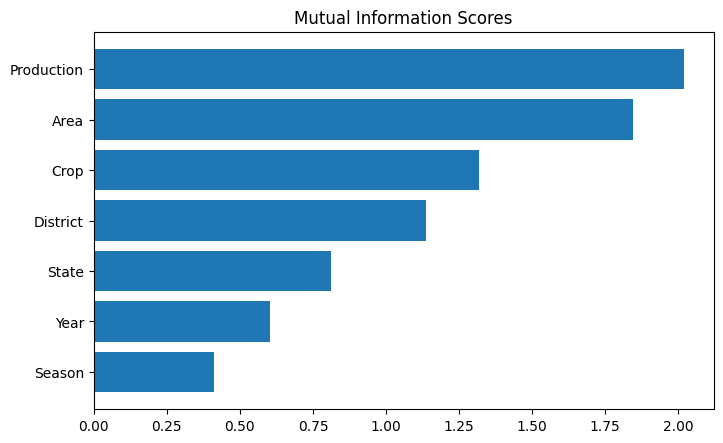

In [38]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_score(mi_scores)

### Clustering
Clusters will break up complicated relationships across features into simpler chunks

#### Clustering columns with high and Low MI Scores:

Columns with **Low MI-Score** maybe not related with **Yield**(Target Column). 
But this maybe related with columns with **High MI Score**
So this is help us to find relationship between these columns.  

Creating a Cluster between **Production** and **Season**

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = ['Production', 'Season']

# data["Season"], _ = data["Season"].factorize()

# Standardize
data_x_scaled = scaler.fit_transform(data_x.loc[:, features])
# data_x_scaled = (data_x_scaled - data_x_scaled.mean(axis=0)) / data_x_scaled.std(axis=0)

In [40]:
data_x_scaled

array([[-0.12452747, -0.93840207],
       [-0.12447379, -0.17023675],
       [-0.1258354 , -0.17023675],
       ...,
       [-0.11606253,  0.59792858],
       [-0.11265117,  0.59792858],
       [-0.11142621,  0.59792858]])

In [41]:
# create cluster feature
kmeans = KMeans(n_clusters=6, random_state=0)
data_x['Cluster'] = kmeans.fit_predict(data_x_scaled)
data_x['Cluster'] = data_x['Cluster'].astype('category')
data_x.loc[:, features+['Cluster']].head()

,Production,Season,Cluster
0,2061.0,0,0
1,2083.0,1,5
2,1525.0,1,5
3,5239.0,0,0
4,5267.0,1,5


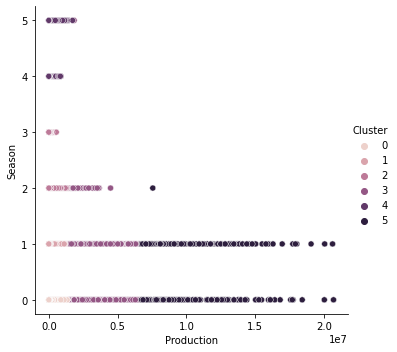

In [49]:
import seaborn as sns
sns.relplot(x='Production', y='Season',
            hue='Cluster', data=data_x)

In [42]:
# Score
score_dataset(data_x, y)

1.1342309827640715

Error Score: get reduced to **1.1342309827640715** from **1.1407533865920862**

## Principal Component Analysis (PCA)
**PCA** basically gives you direct access to the correlational structure of your data.
**PCA** also tells us the amount of variation in each component.

Idea of **PCA**: instead of describing the data with the original features, we describe it with its axes of variation. The axes of variation become the new features.

We going to select high **MI-Score** columns

In [13]:
features = ['Production', 'Area',
            'Crop', 'District']


data_x_f = x.loc[:, features]

# standardize
data_x_scaled = scaler.fit_transform(data_x_f)

In [14]:
from sklearn.decomposition import PCA

# create pca
pca = PCA()
x_pca = pca.fit_transform(data_x_scaled)

# convert to dataframe
component_names = [f'PC{i+1}' for i in range(x_pca.shape[1])]
x_pca = pd.DataFrame(x_pca,
                    columns=component_names)
x_pca.head()

,PC1,PC2,PC3,PC4
0,1.506405,-1.880134,0.271272,-0.678647
1,1.506441,-1.880086,0.271334,-0.678645
2,1.506452,-1.880056,0.271394,-0.678659
3,1.521517,-1.853986,0.297715,-0.680469
4,1.520123,-1.849877,0.295537,-0.682715


In [17]:
loadings = pd.DataFrame(pca.components_.T,       # transpose the matrix of loadings
                       columns=component_names,  # columns are pca
                       index=data_x_f.columns           # rows - original features
                       )
loadings

,PC1,PC2,PC3,PC4
Production,0.601182,0.229106,-0.526282,0.555984
Area,0.413390,0.554046,0.722542,0.008638
Crop,-0.628752,0.259408,0.152242,0.717078
District,-0.268999,0.757133,-0.421643,-0.420245


In [18]:
# function - plot Explained variance
def plot_variance(pca, width=8, dpi=100):
    # create figure
    fig, axis = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n+1)
    # explained variance
    evar = pca.explained_variance_ratio_
    axis[0].bar(grid, evar)
    axis[0].set(xlabel='Component',
               title='% Explained Variance',
               ylim=(0.0, 1.0))
    # cumulative variance
    cvar = np.cumsum(evar)
    axis[1].plot(np.r_[0, grid],
                np.r_[0, cvar], 'o-')
    axis[1].set(xlabel='Component',
               title='% Cumulative Variance',
               ylim=(0.0, 1.0))
    # set figure
    fig.set(figwidth=width, dpi=dpi)
    return axis

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

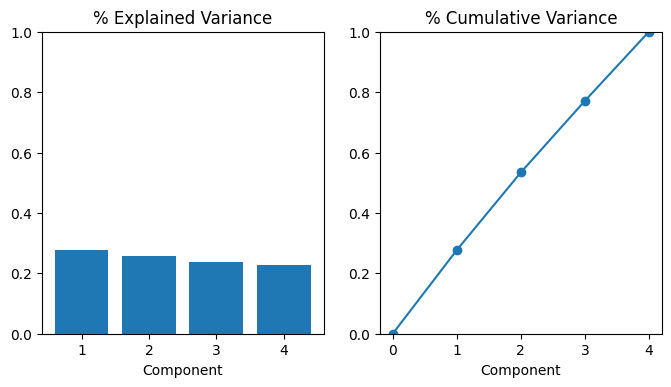

In [56]:
# plot explained variance
plot_variance(pca)

In [20]:
# Take a look mi-score
mi_scores = make_mi_score(x_pca, y,
                          discrete_features=False)
mi_scores

PC4    2.091203
PC1    1.516942
PC2    1.418240
PC3    1.370740
Name: MI Score, dtype: float64

Lets check error score after **PCA** columns added to our dataset

In [21]:
x = data_x.copy()
y = y

# lets add PC1 to dataset
x = x.join(x_pca)

# error score
score_dataset(x, y)

33.58057358833545

Score increases from **33.18483530121455** to **33.58057358833545**

Let's try with cluster between **PCA** columns

In [23]:
features = ['PC1', 'PC2']

# Standardize
data_x_scaled = scaler.fit_transform(x_pca.loc[:, features])

In [54]:
# create cluster feature
kmeans = KMeans(n_clusters=6, random_state=0)
x_pca['PCluster'] = kmeans.fit_predict(data_x_scaled)
x_pca['PCluster'] = x_pca['PCluster'].astype('category')
x_pca.loc[:, features+['PCluster']].head()

,PC1,PC2,PCluster
0,1.506405,-1.880134,0
1,1.506441,-1.880086,0
2,1.506452,-1.880056,0
3,1.521517,-1.853986,0
4,1.520123,-1.849877,0
...,...,...,...
665678,-1.283719,1.299139,5
665679,-1.247840,1.346960,5
665680,-1.288998,1.298107,5
665681,-1.272503,1.320141,5


In [58]:
data_x = data_x.drop('PCluster', axis=1)
data_x

,State,District,Crop,Year,Season,Area,Production,Cluster
0,0,0,0,0,0,1254.0,2061.0,1
1,0,0,0,1,1,1258.0,2083.0,3
2,0,0,0,2,1,1261.0,1525.0,3
3,0,1,0,0,0,3100.0,5239.0,1
4,0,2,0,1,1,3105.0,5267.0,3
...,...,...,...,...,...,...,...,...
665679,33,582,40,19,2,6310.0,15280.0,0
665680,33,583,40,20,2,1895.0,2760.0,0
665681,33,583,40,21,2,3736.0,5530.0,0
665682,33,583,40,22,2,2752.0,6928.0,0


In [59]:
x = data_x.copy()
y = y

# lets add PC1 to dataset
x = x.join(x_pca.PCluster)

In [55]:
# error score
score_dataset(x, y)

34.962748147921594

In [60]:
x = x.drop('PCluster', axis=1)

Score increases from **33.18483530121455** to **34.962748147921594**

### New Features
Make new features from high **MI-Score** columns.

In [11]:
data_x['Feature1'] = data_x.Production / data_x.Area
data_x

,State,District,Crop,Year,Season,Area,Production,Cluster,Feature1
0,0,0,0,0,0,1254.0,2061.0,1,1.643541
1,0,0,0,1,1,1258.0,2083.0,3,1.655803
2,0,0,0,2,1,1261.0,1525.0,3,1.209358
3,0,1,0,0,0,3100.0,5239.0,1,1.690000
4,0,2,0,1,1,3105.0,5267.0,3,1.696296
...,...,...,...,...,...,...,...,...,...
665679,33,582,40,19,2,6310.0,15280.0,0,2.421553
665680,33,583,40,20,2,1895.0,2760.0,0,1.456464
665681,33,583,40,21,2,3736.0,5530.0,0,1.480193
665682,33,583,40,22,2,2752.0,6928.0,0,2.517442


In [12]:
score_dataset(data_x, y)

1.5726806641380444

Score Reduced from **33.18483530121455** to **1.5726806641380444**

### Outlier Detection
We can use **PCA** to detect outliers in the dataset (meaning, data points that are unusually extreme in some way). Outliers can have a detrimental effect on model performance.

Lets show distribution plots for each of the **principal components**.

In [15]:
x_pca.head()

,PC1,PC2,PC3,PC4
0,1.506405,-1.880134,0.271272,-0.678647
1,1.506441,-1.880086,0.271334,-0.678645
2,1.506452,-1.880056,0.271394,-0.678659
3,1.521517,-1.853986,0.297715,-0.680469
4,1.520123,-1.849877,0.295537,-0.682715


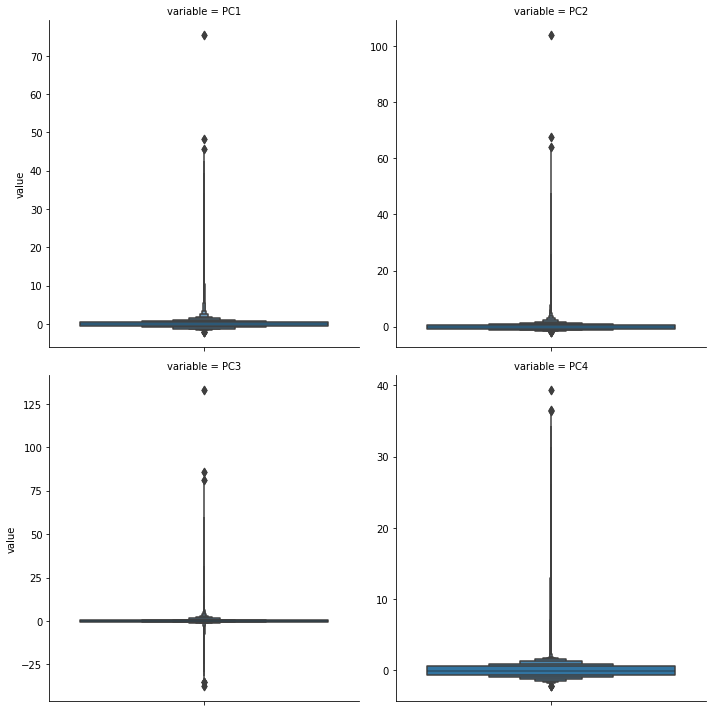

In [17]:
# distribution plot
import seaborn as sns
sns.catplot(y='value', col='variable',
           data=x_pca.melt(), kind='boxen',
           sharey=False, col_wrap=2)

In each of the components there are several points lying at the extreme ends of the distributions - **outliers**

Find the extreme points

Extreme points in the **PC1**:

In [18]:
idx = x_pca['PC1'].sort_values(ascending=False).index
data_x.iloc[idx].head(4)

,State,District,Crop,Year,Season,Area,Production,Cluster,Feature1
331844,33,581,41,20,2,8580100.0,7556300.0,2,0.880677
664686,33,581,41,20,2,8580100.0,7556300.0,2,0.880677
331843,33,580,41,20,2,5544000.0,4485800.0,2,0.809127
664685,33,580,41,20,2,5544000.0,4485800.0,2,0.809127


From the distribution plot of **PC1** we can clearly see that, there are **1 outliers**

So lets remove that outlier

In [12]:
data_x = data_x.copy()
y = y

# let drop outliers
data_x = data_x.drop(331844)
y = y.drop(331844)

In [ ]:
# Error Score
score_dataset(data_x, y)

Score Reduced from **1.5726806641380444** to **1.570153128604112**

Extreme points in the **PC2**:

In [25]:
idx = x_pca['PC2'].sort_values(ascending=False).index
data_x.iloc[idx].head(4)

,State,District,Crop,Year,Season,Area,Production,Cluster,Feature1
331844,33,581,41,20,2,8580100.0,7556300.0,2,0.880677
664686,33,581,41,20,2,8580100.0,7556300.0,2,0.880677
331843,33,580,41,20,2,5544000.0,4485800.0,2,0.809127
664685,33,580,41,20,2,5544000.0,4485800.0,2,0.809127


In [ ]:
idx = x_pca['PC3'].sort_values(ascending=False).index
data_x.iloc[idx].head(4)

From the distribution plot of **PC2** and **PC3** we can clearly see that, there are **1 outliers**

Its the same outlier of **PC1**

So its already removed from Data set

Extreme points in the **PC4**:

In [28]:
idx = x_pca['PC4'].sort_values(ascending=False).index
data_x.iloc[idx].head(4)

,State,District,Crop,Year,Season,Area,Production,Cluster,Feature1
117222,29,451,4,6,1,107106.0,1.597800e+09,3,14917.931769
450064,29,451,4,6,1,107106.0,1.597800e+09,3,14917.931769
615495,29,451,4,18,1,87749.0,1.488200e+09,3,16959.737433
282653,29,451,4,18,1,87749.0,1.488200e+09,3,16959.737433


In [35]:
x = data_x.copy()
y_copy = y.copy()

# let drop outliers
x = x.drop(117222)

y_copy = y_copy.drop(117222)

score_dataset(x, y_copy)

1.6038280484913834

Score Increased from **1.570153128604112** to **1.6038280484913834**

# Machine Learning Model

Make the all Changes on dataset that's reduces Error Score

In [16]:
# Load saved data.csv
import pandas as pd
data  = pd.read_csv('data.csv')

# Dropping Production Units and Area Units columns
data = data.drop('Production Units', axis=1)
data = data.drop('Area Units', axis=1)

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data_copy = data.copy()

features = ['Production', 'Season']
data_copy["Season"], _ = data["Season"].factorize()

# Standardize
scaler = StandardScaler()
data_x_scaled = scaler.fit_transform(data_copy.loc[:, features])

# create cluster feature
kmeans = KMeans(n_clusters=6, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_x_scaled)
data['Cluster'] = data['Cluster'].astype('category')
data.loc[:, features+['Cluster']].head()

,Production,Season,Cluster
0,2061.0,Kharif,1
1,2083.0,Whole Year,3
2,1525.0,Whole Year,3
3,5239.0,Kharif,1
4,5267.0,Whole Year,3


In [18]:
# Create a new feature - Ratio of roduction & Area
data['Feature'] = data_x.Production / data_x.Area
data.head()

,State,District,Crop,Year,Season,Area,Production,Yield,Cluster,Feature
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,2061.0,1.643541,1,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,2083.0,1.655803,3,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1525.0,1.209358,3,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,5239.0,1.690000,1,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,5267.0,1.696296,3,1.696296


In [19]:
# let drop outliers
data = data.drop(331844)

## Model

In [20]:
# setting parameters
x = data.copy()
y = x.pop('Yield')

# Checking Error Score
score_dataset(x, y)

1.570153128604112

In [22]:
# train test data split
from sklearn.model_selection import train_test_split
xgboost = XGBRegressor(n_estimators=500,
                       learning_rate=0.05,
                       n_jobs=4
                      )
for colname in x.select_dtypes(['object', 'category']):
    x[colname], _ = x[colname].factorize()
x_train, x_valid, y_train, y_valid = train_test_split(x, y,
                                                      train_size=0.8,
                                                      test_size=0.2,
                                                      random_state=0)
# model
xgboost.fit(x_train, y_train)
# predict
predict_yield = xgboost.predict(x_valid)

In [23]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(predict_yield, y_valid)
print('Mean Absolute Error : ' + str(mae)) 

Mean Absolute Error : 0.07154786612743286


In [24]:
# Mean Squared Log Error (MSLE)
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(predict_yield, y_valid)
print('Mean Squared Log Error : ' + str(msle))

Mean Squared Log Error : 3.954986818076959e-05


In [26]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_log_error(predict_yield, y_valid)
print('Mean Squared Error : ' + str(mse))

Mean Squared Error : 3.954986818076959e-05


In [27]:
# Error Score - Updated xgboost model
score_dataset(x, y, model=xgboost)

0.544226631080709

### Save Machine Learning Model

- The pickle API for serializing standard Python objects.

- The joblib API for efficiently serializing Python objects with NumPy arrays.

In [30]:
model = xgboost

In [31]:
import joblib

# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [32]:
# Load the model from the file
model_joblib = joblib.load('model.pkl')
model_joblib

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)